In [1]:
% Diffraction limited circular optics:  The Airy Disk
%
% Plotting an Airy disk for diffraction limited optics.
ieInit;


In [2]:
%% Build up the spatial structure in an optical image
scene = sceneCreate;
oi    = oiCreate;
oi    = oiCompute(scene,oi); 

% Pull out the optics
optics = oiGet(oi,'optics');

In [3]:
nSamp = 25; thisWave = 500; units = 'um';

clear fSupport
val = opticsGet(optics,'dlFSupport',thisWave,units,nSamp);
[fSupport(:,:,1),fSupport(:,:,2)] = meshgrid(val{1},val{2});

% Over sample to make a smooth image. This move increases the spatial
% frequency resolution (highest spatial frequency) by a factor of 4.
fSupport = fSupport*4;  

% Frequency units are cycles/micron. The spatial frequency support runs
% from -Nyquist:Nyquist. With this support, the Nyquist frequency is
% actually the highest (peak) frequency value. There are two samples per
% Nyquist, so the sample spacing is 1/(2*peakF)
peakF = max(fSupport(:));
deltaSpace = 1/(2*peakF);

In [4]:
otf = dlMTF(oi,fSupport,thisWave,units);

% Derive the psf from the OTF
psf = fftshift(ifft2(otf));

% Make the spatial support for the PSF
clear sSupport
samp = (-nSamp:(nSamp-1));
[X,Y] = meshgrid(samp,samp);
sSupport(:,:,1) = X*deltaSpace;
sSupport(:,:,2) = Y*deltaSpace;

% Calculate the Airy disk
fNumber = opticsGet(optics,'fNumber');

% This is the Airy disk radius, by formula
radius = (2.44*fNumber*thisWave*10^-9)/2 * ieUnitScaleFactor(units);

% Draw a circle at the first zero crossing (Airy disk)
nCircleSamples = 200;
[adX,adY,adZ] = ieShape('circle',nCircleSamples,radius);

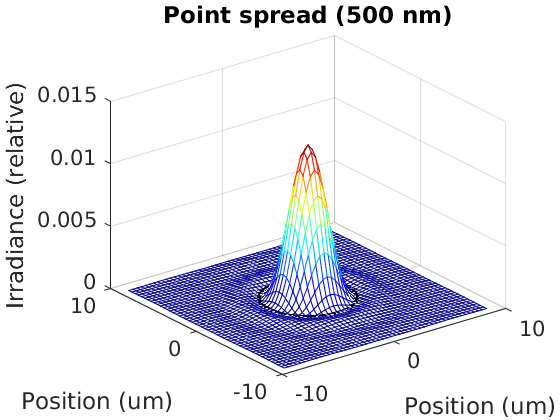

[Warning: MATLAB has disabled some advanced graphics rendering features by
switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>.]


In [5]:
x = sSupport(:,:,1); y = sSupport(:,:,2);
mesh(x,y,psf);
colormap(jet)

% Label the graph and draw the Airy disk
hold on; plot3(adX,adY,adZ,'k.'); hold off;
xlabel('Position (um)'); ylabel('Position (um)');
zlabel('Irradiance (relative)');
title(sprintf('Point spread (%.0f nm)',thisWave));

% Return the plotted values to the user.  They can retrieve these using
%
% uData = get(gcf,'userData');   %  Note that case sensitivity is ignored
udata.x = x; udata.y = y; udata.psf = psf;
set(gcf,'userdata',udata);